### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Friday, Mar 5th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from scipy import optimize
data1= np.load('../../homeworks/hw_data/hw4_data_1.npy')

In [55]:
#1
smean= (np.sum(data1[:,0]/data1[:,1]**2))/(np.sum(1/data1[:,1]**2))
ssigma= (np.sum(1/data1[:,1]**2))**-.5
print('sample mean = '+str(smean)+',','uncertainty on sample mean = '+str(ssigma))

sample mean = 4.942118214425304, uncertainty on sample mean = 0.43024334605205083


In [56]:
#2
#Gonna go with the maximizing logL/minimizing chisq route using a Gaussian
def chi_sq(mu, sigma,x):
    return np.sum(((x - mu) / sigma) ** 2, -1)
f = lambda mu: chi_sq(mu,sigma=data1[:,1],x=data1[:,0])
mu= 5
bestmu= optimize.fmin(f,mu)
print('Best fit mean = '+ str(bestmu))



Optimization terminated successfully.
         Current function value: 5.614502
         Iterations: 13
         Function evaluations: 26
Best fit mean = [4.94213867]


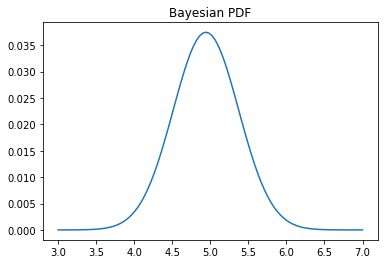

In [57]:
#3
xgrid= np.linspace(3,7,100)
xpdf= np.empty([100])

#likelihood
for i in range(100):
    xpdf[i]= np.prod((1/(data1[:,1]*np.sqrt(2*np.pi)))*np.exp(-.5*((data1[:,0]-xgrid[i])/data1[:,1])**2))
#prior
prior= scipy.stats.uniform(loc=3,scale=4).pdf(xgrid)
#pdf
xppdf= xpdf*prior

#I wrote this normalizing function for pdfs as part of my research actually so I thought I'd use it here
def Pnorm(P,dm):
        dn= P*dm
        n= np.sum(dn)
        Pn= dn/n
        return Pn
dm= xgrid[1]-xgrid[0]
xppdf= Pnorm(xppdf,dm)

plt.plot(xgrid,xppdf)
plt.title('Bayesian PDF')
plt.show()


In [58]:
#4
xppdfcumu= np.cumsum(xppdf)
limits= np.interp([.1585,.8415],xppdfcumu,xgrid)
print('68.3% credible region = '+str(limits))
print('Mean +/- standard error = '+str(smean-ssigma)+ ', ' + str(smean+ssigma))
print('MAP = '+str(xgrid[np.nonzero(xppdf==np.amax(xppdf))]))

68.3% credible region = [4.49140678 5.35261036]
Mean +/- standard error = 4.511874868373253, 5.372361560477355
MAP = [4.93939394]


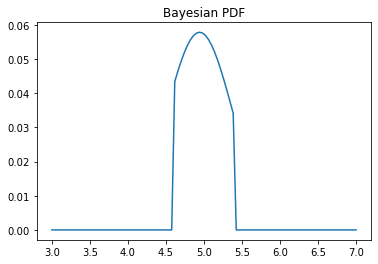

68.3% credible region = [4.71231239 5.22005538]
Mean +/- standard error = 4.511874868373253, 5.372361560477355
MAP = [4.93939394]


In [59]:
#5
prior2= scipy.stats.uniform(loc=4.6,scale=0.8).pdf(xgrid)
#pdf
xppdf2= xpdf*prior2
xppdf2= Pnorm(xppdf2,dm)

plt.plot(xgrid,xppdf2)
plt.title('Bayesian PDF')
plt.show()

xppdfcumu2= np.cumsum(xppdf2)
limits2= np.interp([.1585,.8415],xppdfcumu2,xgrid)
print('68.3% credible region = '+str(limits2))
print('Mean +/- standard error = '+str(smean-ssigma)+ ', ' + str(smean+ssigma))
print('MAP = '+str(xgrid[np.nonzero(xppdf2==np.amax(xppdf2))]))

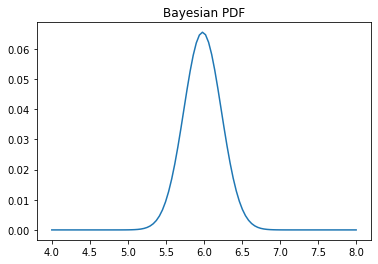

68.3% credible region = [5.71408594 6.20759475]
Mean +/- standard error = 4.511874868373253, 5.372361560477355
MAP = [5.97979798]


In [60]:
#6
xgrid2= np.linspace(4,8,100)
prior3= scipy.stats.norm(6,.3).pdf(xgrid2)
#pdf
xppdf3= xpdf*prior3
xppdf3= Pnorm(xppdf3,dm)

plt.plot(xgrid2,xppdf3)
plt.title('Bayesian PDF')
plt.show()

xppdfcumu3= np.cumsum(xppdf3)
limits3= np.interp([.1585,.8415],xppdfcumu3,xgrid2)
print('68.3% credible region = '+str(limits3))
print('Mean +/- standard error = '+str(smean-ssigma)+ ', ' + str(smean+ssigma))
print('MAP = '+str(xgrid2[np.nonzero(xppdf3==np.amax(xppdf3))]))

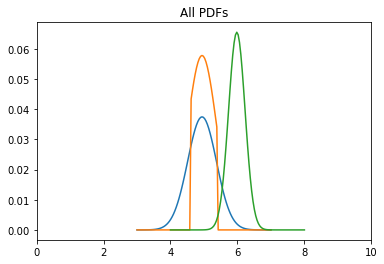

In [61]:
#7
plt.plot(xgrid,xppdf)
plt.plot(xgrid,xppdf2)
plt.plot(xgrid2,xppdf3)
plt.xlim(0,10)
plt.title('All PDFs')
plt.show()

In [62]:
#8
uniformevidence= np.sum(xpdf*prior*dm)
print('Uniform Prior Evidence = '+str(uniformevidence))
# Integral of gaussian*delta function at best fit is just the pdf of the gaussian at the best fit so:
deltaevidence= np.interp(bestmu,xgrid,xpdf)
print('Delta Prior Evidence = '+str(deltaevidence))
#The evidence for the delta function prior is greater.
print('Bayes Factor Delta/Uniform = '+str(deltaevidence/uniformevidence))
#The model where we know the mean is significantly preferred, so decreasing the number of parameters does make 
#a real difference here. You just have to actually be comfortable saying you know what the mean is, that's the caveat.

Uniform Prior Evidence = 2.8918738694743654e-08
Delta Prior Evidence = [1.0722982e-07]
Bayes Factor Delta/Uniform = [3.70797016]


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

### Solution

In [63]:
#1
data2= np.load('../../homeworks/hw_data/hw4_data_2.npy')
x, y, sigma_y = data2

In [64]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

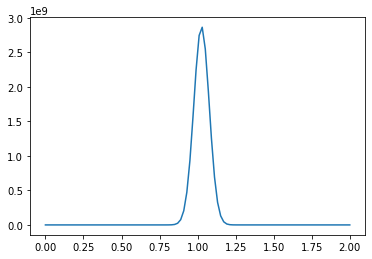

In [65]:
#2
xgrid2= np.ones([2,100])
xgrid2[0,:]= -0.23
xgrid2[1,:]= np.linspace(0,2,100)

logs= np.empty([100])
for i in range(100):
    logs[i]= logL((xgrid2[:,i]),data2)
prior= scipy.stats.uniform(0.5,1).pdf(xgrid2[1,:])
posterior= np.exp(logs)*prior

plt.plot(xgrid2[1,:],posterior)
plt.show()

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

In [66]:
#3
evidence= np.sum(posterior*0.02)
print('Evidence = '+str(evidence))

Evidence = 362027885.82905287


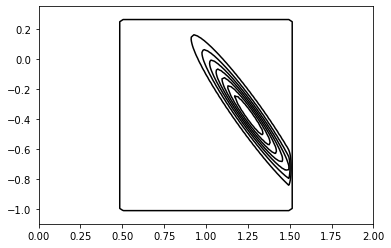

In [67]:
#4
#quadratic coefficient grid
ygrid= np.linspace(-1.1,0.35,100)
#meshgrid to get yfit for all combos of coefficients
aa,bb= np.meshgrid(xgrid2[1,:],ygrid)
#all the yfits will go in this cube
yfits= np.empty([100,100,20])
x,y,sigma_y=data2
#filling up the cube
for i in range(100):
    for j in range(100):
        yfits[i,j,:]= -0.23 + aa[i,j]*x + bb[i,j]*x**2
#getting the likelihoods
like = np.empty([100,100])
for i in range(100):
    for j in range(100):
        like[i,j]= np.prod(scipy.stats.norm(yfits[i,j,:],sigma_y).pdf(y))

posterior2= like*scipy.stats.uniform(0.5,1).pdf(aa)*scipy.stats.uniform(-1,1.25).pdf(bb)
plt.contour(aa,bb,posterior2,colors='k')



    


In [68]:
#5
xdm= xgrid2[1,1]-xgrid2[1,0]
ydm= ygrid[1]-ygrid[0]
evidence2= np.sum(posterior2*xdm*ydm)
print('Evidence = '+str(evidence2))

Evidence = 493040402.79746175


In [69]:
#6
bf= evidence/evidence2
print('Bayes Factor Linear/Quadratic = '+str(bf))
print('Bayes Factor Quadratic/Linear = '+str(1/bf))
#Unlike the BIC example, this favors the quadratic model. However, according to the Jeffreys scale it's barely
#worth mentioning.

Bayes Factor Linear/Quadratic = 0.7342763063127139
Bayes Factor Quadratic/Linear = 1.3618851533173666
